# **LOADING DATASET**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Diabetes&hypetension_data - Sheet1.csv')
df.head(10)

,AGE,GENDER,VISIT TYPE,WEIGHT(kg),HEIGHT(cm),BMI,WAIST CIRCUMFERENCE,BP(mmHg),BLOOD SUGAR(mmol/L),HTN,DIABETES,BOTH DM+HTN,TREATMENT
0,66.0,F,R,70.4,158.0,28.20,109.0,148/86,11.2,0,1,0,ab
1,64.0,M,R,64.0,169.0,22.41,93.0,127/67,7.3,1,1,1,abe
2,56.0,F,R,105.0,163.0,39.52,NaN,118/67,6.5,1,0,0,ae
3,32.0,M,R,59.0,163.0,22.21,83.0,154/71,6.5,1,1,1,ade
4,74.0,M,R,80.2,167.0,28.76,101.0,142/84,11.3,1,1,1,abe
5,34.0,F,R,NaN,NaN,NaN,NaN,132/83,9.8,0,1,0,ab
6,39.0,F,R,NaN,154.0,NaN,NaN,117/72,6.1,1,0,0,ae
7,54.0,M,R,67.8,166.0,24.60,84.0,186/117,16.7,1,1,1,abe
8,66.0,F,R,73.8,161.0,28.47,96.0,143/84,14.8,1,1,1,abe
9,82.0,F,R,NaN,NaN,NaN,NaN,NaN,8.2,0,1,0,ab


In [3]:
df.tail()

,AGE,GENDER,VISIT TYPE,WEIGHT(kg),HEIGHT(cm),BMI,WAIST CIRCUMFERENCE,BP(mmHg),BLOOD SUGAR(mmol/L),HTN,DIABETES,BOTH DM+HTN,TREATMENT
639,55.0,M,F,72.2,166.0,26.20,89.0,139/80,10.6,0,1,0,abe
640,NaN,F,R,64.1,160.0,25.04,58.0,148/96,19.5,1,1,1,abe
641,58.0,F,R,49.5,158.0,19.83,71.0,108/66,9.3,0,1,0,ab
642,55.0,F,R,96.8,170.0,33.49,122.0,132/75,18.9,0,1,0,ab
643,66.0,F,R,76.5,156.0,31.43,80.0,159/93,6.8,1,1,1,abe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  642 non-null    float64
 1   GENDER               644 non-null    object 
 2   VISIT TYPE           644 non-null    object 
 3   WEIGHT(kg)           591 non-null    float64
 4   HEIGHT(cm)           592 non-null    float64
 5   BMI                  576 non-null    float64
 6   WAIST CIRCUMFERENCE  562 non-null    float64
 7   BP(mmHg)             622 non-null    object 
 8   BLOOD SUGAR(mmol/L)  585 non-null    float64
 9   HTN                  644 non-null    int64  
 10  DIABETES             644 non-null    int64  
 11  BOTH DM+HTN          644 non-null    int64  
 12  TREATMENT            641 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 65.5+ KB


In [5]:
# Exclude 'HTN' and 'BOTH DM+HTN' columns from describe
columns_to_describe = df.columns.difference(['HTN', 'BOTH DM+HTN'])
display(df[columns_to_describe].describe())

,AGE,BLOOD SUGAR(mmol/L),BMI,DIABETES,HEIGHT(cm),WAIST CIRCUMFERENCE,WEIGHT(kg)
count,642.000000,585.000000,576.000000,644.000000,592.000000,562.000000,591.000000
mean,56.232866,11.273162,26.904497,0.760870,163.075000,96.999911,74.330998
std,11.461830,5.533334,8.685729,0.426884,9.255641,14.328559,15.811860
min,23.000000,2.700000,0.000000,0.000000,103.000000,43.000000,7.250000
25%,49.000000,7.000000,23.755000,1.000000,158.000000,88.000000,63.725000
50%,56.000000,9.800000,27.370000,1.000000,163.000000,98.000000,73.800000
75%,64.000000,13.600000,31.155000,1.000000,169.000000,106.000000,83.650000
max,91.000000,32.400000,84.460000,1.000000,186.600000,179.000000,132.000000


In [6]:
df.shape

(644, 13)

In [7]:
df.columns

Index(['AGE', 'GENDER', 'VISIT TYPE', 'WEIGHT(kg)', 'HEIGHT(cm)', 'BMI',
       'WAIST CIRCUMFERENCE', 'BP(mmHg)', 'BLOOD SUGAR(mmol/L)', 'HTN',
       'DIABETES', 'BOTH DM+HTN', 'TREATMENT'],
      dtype='object')

# **Cleaning Dataset**

In [8]:
#chechking for missing values
df.isnull().sum()

AGE                     2
GENDER                  0
VISIT TYPE              0
WEIGHT(kg)             53
HEIGHT(cm)             52
BMI                    68
WAIST CIRCUMFERENCE    82
BP(mmHg)               22
BLOOD SUGAR(mmol/L)    59
HTN                     0
DIABETES                0
BOTH DM+HTN             0
TREATMENT               3
dtype: int64

# **Handling Missing Values**

In [9]:
# Impute numerical columns with the mean
numerical_cols = ['AGE', 'WEIGHT(kg)', 'HEIGHT(cm)', 'BMI', 'WAIST CIRCUMFERENCE', 'BLOOD SUGAR(mmol/L)']
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Impute categorical columns with the mode
categorical_cols = ['HTN', 'BOTH DM+HTN', 'TREATMENT']
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# For the 'BP(mmHg)' column, which is mixed, we can also use the mode or a placeholder
if df['BP(mmHg)'].isnull().any():
    df['BP(mmHg)'].fillna(df['BP(mmHg)'].mode()[0], inplace=True)

# Replace spaces in 'DIABETES' column with '0' and then convert to integer type
df['DIABETES'] = df['DIABETES'].replace(' ', '0').astype(int)


# Check again for missing values
df.isnull().sum()

C:\Users\Setey\AppData\Local\Temp\ipykernel_14584\3686553560.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Setey\AppData\Local\Temp\ipykernel_14584\3686553560.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

AGE                    0
GENDER                 0
VISIT TYPE             0
WEIGHT(kg)             0
HEIGHT(cm)             0
BMI                    0
WAIST CIRCUMFERENCE    0
BP(mmHg)               0
BLOOD SUGAR(mmol/L)    0
HTN                    0
DIABETES               0
BOTH DM+HTN            0
TREATMENT              0
dtype: int64

In [10]:
df.shape

(644, 13)

In [11]:
#checking for duplicates
df.duplicated().sum()

np.int64(40)

In [12]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
display(df.duplicated().sum())

np.int64(0)

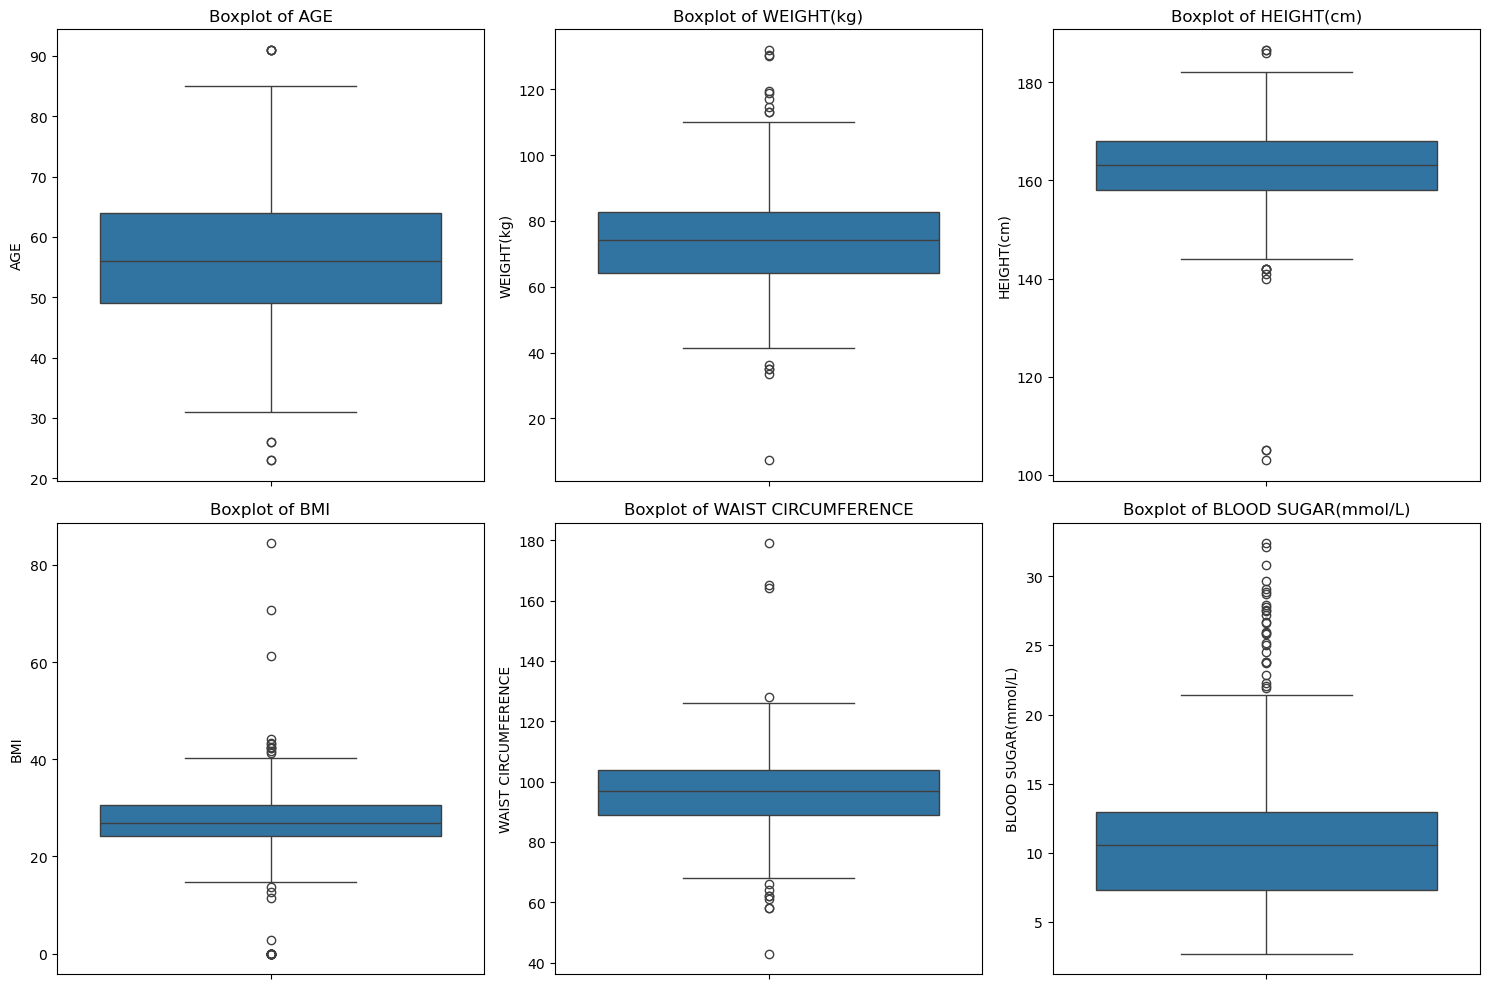


Key: Counts and Outliers per Variable
           Variable  Count  Outliers
                AGE    604         8
         WEIGHT(kg)    604        14
         HEIGHT(cm)    604        12
                BMI    604        40
WAIST CIRCUMFERENCE    604        12
BLOOD SUGAR(mmol/L)    604        27


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create subplots (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten for easy indexing

# Automatically get numeric columns from your DataFrame
numerical_cols_for_boxplot = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Then limit to first 6 columns if needed
numerical_cols_for_boxplot = numerical_cols_for_boxplot[:6]

# Store counts and outliers for key
summary_data = []

for i, col in enumerate(numerical_cols_for_boxplot[:6]):  # Limit to 6 columns
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    
    # Count of non-missing values
    count = df[col].notnull().sum()
    
    # Calculate outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    
    # Save for key
    summary_data.append({'Variable': col, 'Count': count, 'Outliers': outliers})

# Hide unused subplots if fewer than 6 columns
n_cols = len(numerical_cols_for_boxplot[:6])
for i in range(n_cols, 6):
    axes[i].set_visible(False)

plt.tight_layout()

# Display figure
plt.show()

# Create a key (summary table)
summary_df = pd.DataFrame(summary_data)
print("\nKey: Counts and Outliers per Variable")
print(summary_df.to_string(index=False))



In [14]:
# Deal with outliers using IQR
numerical_cols = ['AGE', 'WEIGHT(kg)', 'HEIGHT(cm)', 'BMI', 'WAIST CIRCUMFERENCE', 'BLOOD SUGAR(mmol/L)']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the shape of the DataFrame after removing outliers
display(df.shape)

(506, 13)

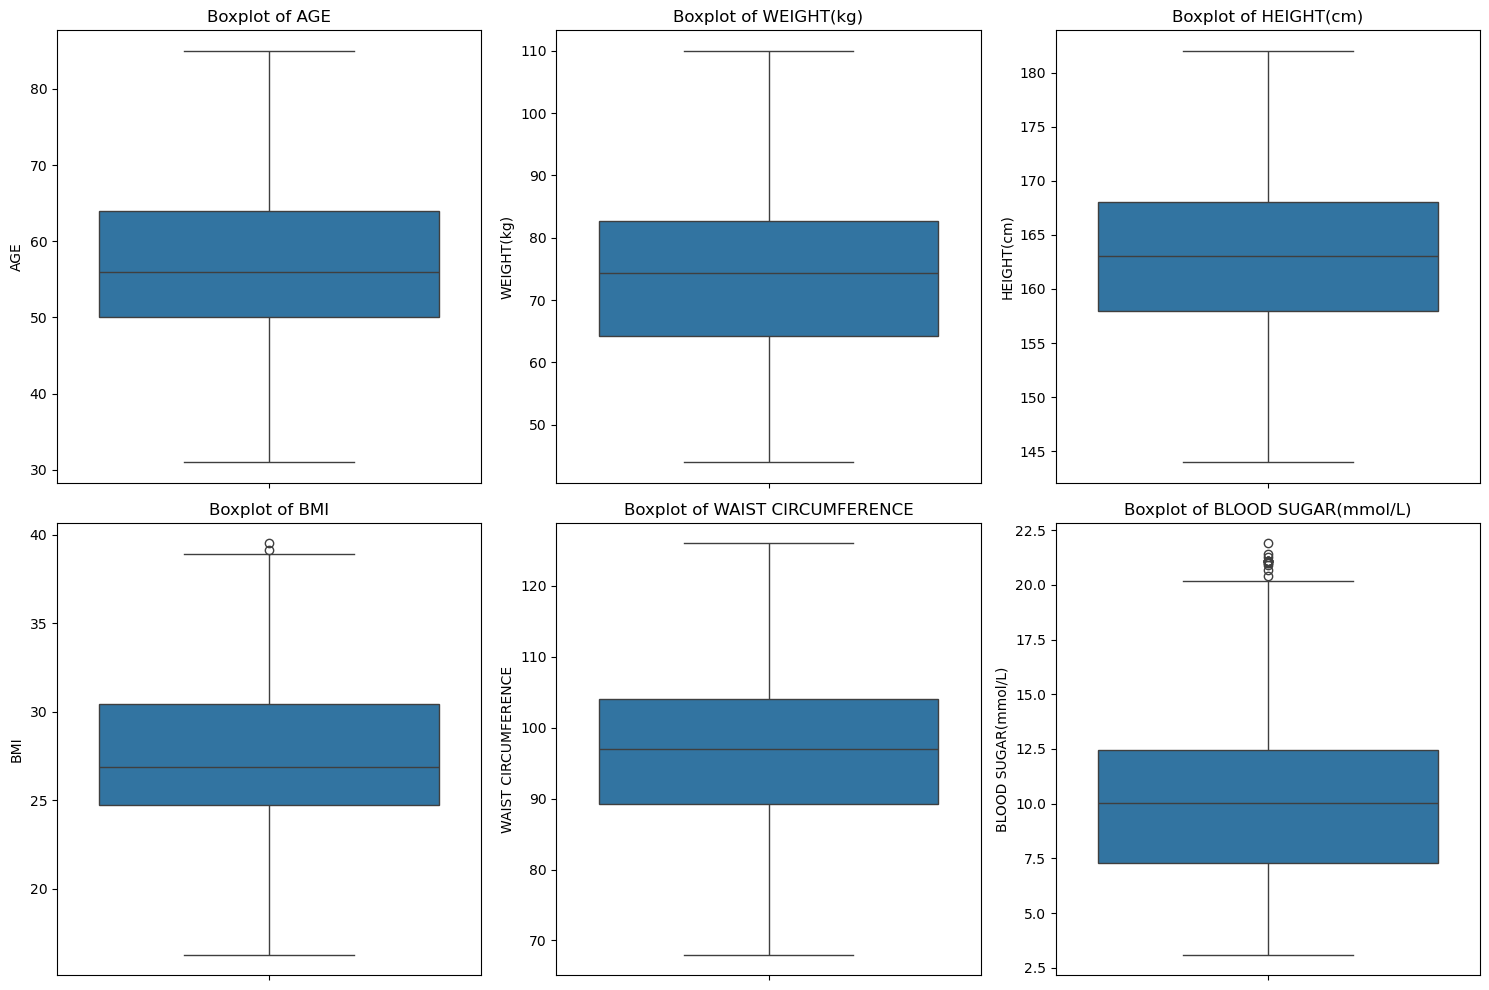

In [15]:
# Checking for outliers in specified numerical columns with boxplots
numerical_cols_for_boxplot = ['AGE', 'WEIGHT(kg)', 'HEIGHT(cm)', 'BMI', 'WAIST CIRCUMFERENCE', 'BLOOD SUGAR(mmol/L)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_boxplot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# **Data visualization**

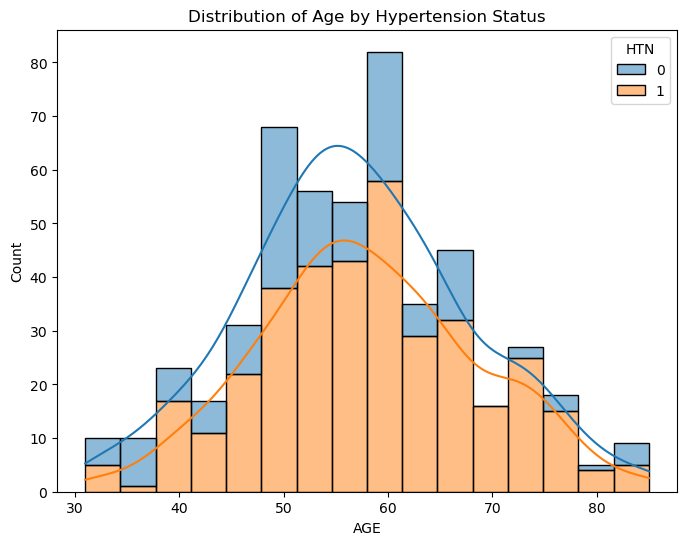

In [16]:
# Histograms to show prevalence of hypertension in relation to age, gender, weight, and BMI

# Age vs Hypertension
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', hue='HTN', multiple='stack', kde=True)
plt.title('Distribution of Age by Hypertension Status')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

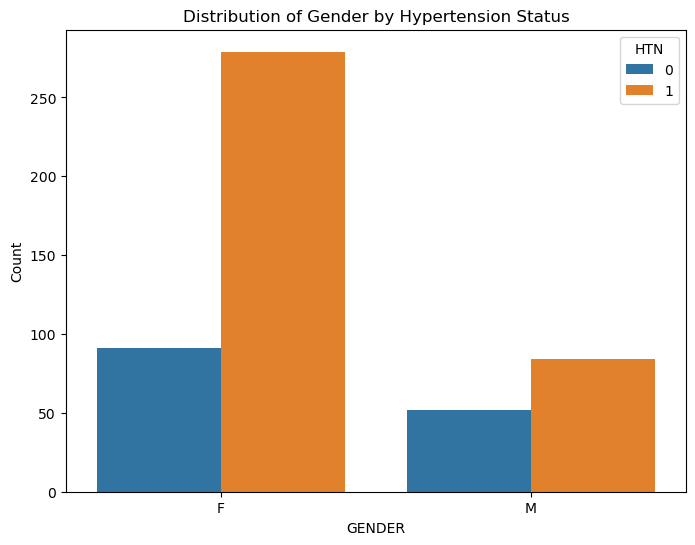

In [17]:
# Gender vs Hypertension
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GENDER', hue='HTN')
plt.title('Distribution of Gender by Hypertension Status')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.show()

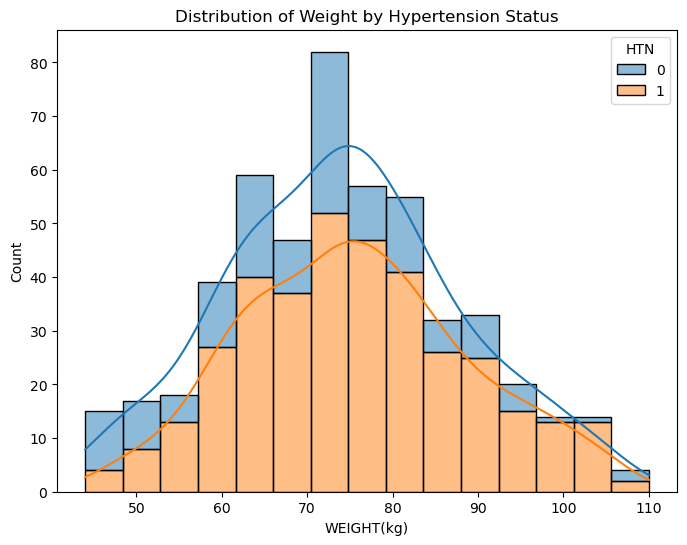

In [18]:
# Weight vs Hypertension
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='WEIGHT(kg)', hue='HTN', multiple='stack', kde=True)
plt.title('Distribution of Weight by Hypertension Status')
plt.xlabel('WEIGHT(kg)')
plt.ylabel('Count')
plt.show()

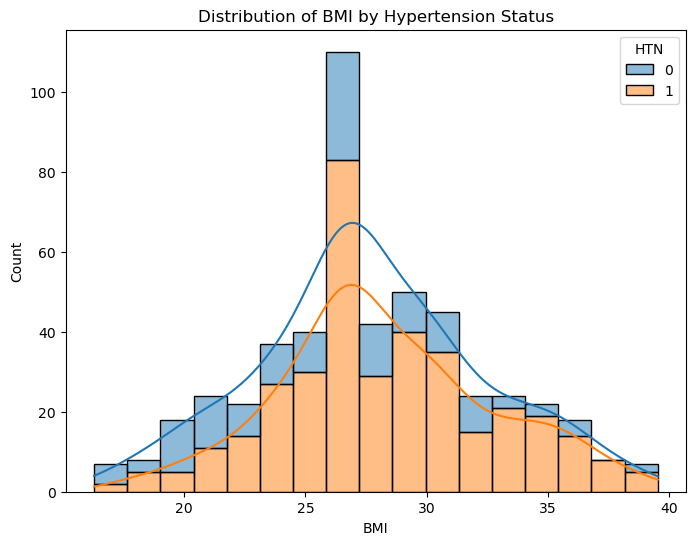

In [19]:
# BMI vs Hypertension
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BMI', hue='HTN', multiple='stack', kde=True)
plt.title('Distribution of BMI by Hypertension Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [20]:
# Count how many patients have hypertension
htn_count = df[df['HTN'] == 1].shape[0]
# Convert to numeric (forcing non-numeric to NaN)
df['HTN'] = pd.to_numeric(df['HTN'], errors='coerce')
print("Number of hypertension (HTN) patients:", htn_count)

Number of hypertension (HTN) patients: 363


In [21]:
# Convert to numeric (forcing non-numeric to NaN)
df['HTN'] = pd.to_numeric(df['HTN'], errors='coerce')

 TREATMENT CODE KEY:

a = Diet and physical activity
b = OGLAs (Oral Glucose-Lowering Agents)
d = Insulin
e = Antihypertensive
f = Herbal
g = Other

          
Exact Treatment Code Counts:
TREATMENT_CODE
abe    227
ae     111
ab      12
ade      6
e        2
ad       2
a        2
be       1
Name: count, dtype: int64

Total Hypertensive Patients Counted: 363


C:\Users\Setey\AppData\Local\Temp\ipykernel_14584\249299914.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


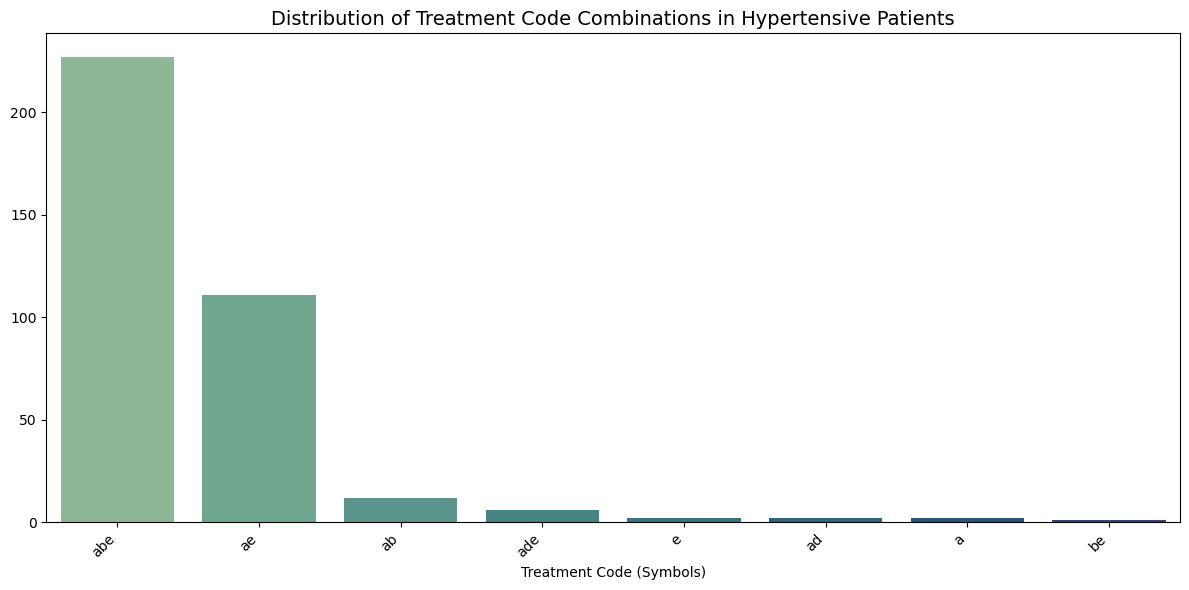

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Function to simplify treatment codes ---
def simplify_treatment_code(treatment):
    if pd.isna(treatment):
        return 'Other'

    # Clean to lowercase, unique + sorted letters for consistency
    t = ''.join(sorted(set(treatment.lower())))
    valid_codes = set('abdefg')
    t = ''.join([ch for ch in t if ch in valid_codes])

    if not t:
        return 'Other'
    return t


# --- Filter hypertensive patients ---
hypertensive_df = df[df['HTN'] == 1].copy()

# --- Apply function ---
hypertensive_df['TREATMENT_CODE'] = hypertensive_df['TREATMENT'].apply(simplify_treatment_code)

# --- Filter out 'Other' ---
hypertensive_df_filtered = hypertensive_df[hypertensive_df['TREATMENT_CODE'] != 'Other']

# --- Count occurrences of each combination ---
treatment_counts = hypertensive_df_filtered['TREATMENT_CODE'].value_counts().sort_values(ascending=False)
# --- Treatment key ---
print(" TREATMENT CODE KEY:")
print("""
a = Diet and physical activity
b = OGLAs (Oral Glucose-Lowering Agents)
d = Insulin
e = Antihypertensive
f = Herbal
g = Other""")
print("""
          """)
# --- Print exact numbers ---
print("Exact Treatment Code Counts:")
print(treatment_counts)
print("\nTotal Hypertensive Patients Counted:", treatment_counts.sum())
# --- Visualization ---
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=treatment_counts.index,
    y=treatment_counts.values,
    palette='crest')
plt.title('Distribution of Treatment Code Combinations in Hypertensive Patients', fontsize=14)
plt.xlabel('Treatment Code (Symbols)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Data Preparation**

## **Data Separation as x and y**

In [23]:
#Data Separation as x and y
X = df.drop(columns=['HTN', 'HEIGHT(cm)', 'VISIT TYPE', 'WAIST CIRCUMFERENCE'], axis=1)
y = df['HTN']

In [24]:
display(X.head())
display(y.head())

,AGE,GENDER,WEIGHT(kg),BMI,BP(mmHg),BLOOD SUGAR(mmol/L),DIABETES,BOTH DM+HTN,TREATMENT
0,66.0,F,70.4,28.20,148/86,11.2,1,0,ab
1,64.0,M,64.0,22.41,127/67,7.3,1,1,abe
2,56.0,F,105.0,39.52,118/67,6.5,0,0,ae
3,32.0,M,59.0,22.21,154/71,6.5,1,1,ade
4,74.0,M,80.2,28.76,142/84,11.3,1,1,abe


0    0
1    1
2    1
3    1
4    1
Name: HTN, dtype: int64

In [25]:
# Handle categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['GENDER'], drop_first=True)

print("Features (X) after one-hot encoding shape:", X.shape)
print("Features (X) after one-hot encoding columns:", X.columns)

Features (X) after one-hot encoding shape: (506, 9)
Features (X) after one-hot encoding columns: Index(['AGE', 'WEIGHT(kg)', 'BMI', 'BP(mmHg)', 'BLOOD SUGAR(mmol/L)',
       'DIABETES', 'BOTH DM+HTN', 'TREATMENT', 'GENDER_M'],
      dtype='object')


# **Data Splitting**

In [26]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()
print("y_train as DataFrame shape:", y_train_df.shape)
print("y_test as DataFrame shape:", y_test_df.shape)
print(X_train.shape)
print(X_test.shape)

y_train as DataFrame shape: (404, 1)
y_test as DataFrame shape: (102, 1)
(404, 9)
(102, 9)


# **Model Building**

# **Support Vector Machine**

In [27]:
from sklearn.svm import SVC

In [28]:
# modelling and predicting support vector machine  model
import numpy as np
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import pandas as pd

svr = SVC()

# Preprocessing steps for X_train and X_test within the modeling cell

# Function to preprocess the BP column
def preprocess_bp(df):
    bp_split = df['BP(mmHg)'].str.split('/', expand=True)
    df['SYSTOLIC BP'] = pd.to_numeric(bp_split[0], errors='coerce')
    df['DIASTOLIC BP'] = pd.to_numeric(bp_split[1], errors='coerce')
    df = df.drop('BP(mmHg)', axis=1)
    return df

# Apply preprocessing to both train and test sets
X_train_processed = preprocess_bp(X_train.copy())
X_test_processed = preprocess_bp(X_test.copy())

# Concatenate train and test sets for consistent one-hot encoding
X_combined = pd.concat([X_train_processed, X_test_processed], ignore_index=True)

# Handle categorical columns using one-hot encoding
categorical_cols_to_encode = ['GENDER', 'TREATMENT']

# Ensure these columns exist in the combined DataFrame before encoding
cols_to_encode_present = [col for col in categorical_cols_to_encode if col in X_combined.columns]

X_combined_encoded = pd.get_dummies(X_combined, columns=cols_to_encode_present, drop_first=True)

# Split back into train and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X_train_processed)].copy()
X_test_encoded = X_combined_encoded.iloc[len(X_train_processed):].copy()


# Select numerical columns for imputation
numerical_cols_for_imputation = X_train_encoded.select_dtypes(include=np.number).columns.tolist()


# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_encoded[numerical_cols_for_imputation])
X_test_imputed = imputer.transform(X_test_encoded[numerical_cols_for_imputation])

# Convert back to DataFrame to keep column names if needed, although SVC works with numpy arrays
X_train_imputed = pd.DataFrame(X_train_imputed, columns=numerical_cols_for_imputation, index=X_train_processed.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=numerical_cols_for_imputation, index=X_test_processed.index)


# Train the SVC model with imputed and encoded data
svr.fit(X_train_imputed, y_train)
ys_pred = svr.predict(X_test_imputed)
ys_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# evaluating support vector machine using accuracy, f1 score, recall and precision
from sklearn import metrics

accuracy_svm = metrics.accuracy_score(y_test, ys_pred)
f1_svm = metrics.f1_score(y_test, ys_pred, average='weighted')
recall_svm = metrics.recall_score(y_test, ys_pred, average='weighted')
precision_svm = metrics.precision_score(y_test, ys_pred, average='weighted')

svm_results = pd.DataFrame(['Support Vector Machine', accuracy_svm, f1_svm, recall_svm, precision_svm]).transpose()
svm_results.columns = ['Model','Accuracy', 'F1 Score','Recall','Precision']
display(svm_results)

C:\Users\Setey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,F1 Score,Recall,Precision
0,Support Vector Machine,0.696078,0.571348,0.696078,0.484525


# Random **Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
#modelling and predicting random forest model
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

rf=RandomForestClassifier()

# Preprocessing steps for X_train and X_test within the modeling cell

# Function to preprocess the BP column
def preprocess_bp(df):
    bp_split = df['BP(mmHg)'].str.split('/', expand=True)
    df['SYSTOLIC BP'] = pd.to_numeric(bp_split[0], errors='coerce')
    df['DIASTOLIC BP'] = pd.to_numeric(bp_split[1], errors='coerce')
    df = df.drop('BP(mmHg)', axis=1)
    return df

X_train_processed = preprocess_bp(X_train.copy())
X_test_processed = preprocess_bp(X_test.copy())

# Concatenate train and test sets for consistent one-hot encoding
X_combined = pd.concat([X_train_processed, X_test_processed], ignore_index=True)


# Handle categorical columns using one-hot encoding
# Removed 'BLOOD_SUGAR_CATEGORY' and 'VISIT TYPE' as they don't exist
categorical_cols_to_encode = ['GENDER', 'TREATMENT']

# Ensure these columns exist in the combined DataFrame before encoding
cols_to_encode_present = [col for col in categorical_cols_to_encode if col in X_combined.columns]

X_combined_encoded = pd.get_dummies(X_combined, columns=cols_to_encode_present, drop_first=True)

# Split back into train and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X_train_processed)].copy()
X_test_encoded = X_combined_encoded.iloc[len(X_train_processed):].copy()


# Select numerical columns for imputation
# Re-selecting numerical columns after one-hot encoding as new numerical columns (from dummies) are added
numerical_cols_for_imputation = X_train_encoded.select_dtypes(include=np.number).columns.tolist()


# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_encoded[numerical_cols_for_imputation])
X_test_imputed = imputer.transform(X_test_encoded[numerical_cols_for_imputation])

# Convert back to DataFrame to keep column names if needed, although RandomForest works with numpy arrays
X_train_imputed = pd.DataFrame(X_train_imputed, columns=numerical_cols_for_imputation, index=X_train_processed.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=numerical_cols_for_imputation, index=X_test_processed.index)


# Train the RandomForest model with imputed and encoded data
rf.fit(X_train_imputed, y_train)
yr_pred=rf.predict(X_test_imputed)
yr_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [32]:
#evaluating random forest using accuracy,f1 score , recall and precision
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yr_pred)
f1 = metrics.f1_score(y_test, yr_pred, average='weighted')
recall = metrics.recall_score(y_test, yr_pred, average='weighted')
precision = metrics.precision_score(y_test, yr_pred, average='weighted')

rf_results=pd.DataFrame(['Random Forest', accuracy, f1, recall, precision]).transpose()
rf_results.columns=['Model','Accuracy', 'F1 Score','Recall','Precision']
rf_results

,Model,Accuracy,F1 Score,Recall,Precision
0,Random Forest,0.941176,0.941176,0.941176,0.941176


In [33]:
import joblib
# Replace rf_model with your trained model variable name
joblib.dump(rf_model, "RandomForest_model.pkl")
print("✅ Model saved as RandomForest_model.pkl")

NameError: name 'rf_model' is not defined

In [ ]:
# Compare the performance of the two models
model_comparison = pd.concat([svm_results, rf_results], ignore_index=True)
display(model_comparison)

# Model **Deployment**

In [ ]:
!pip install streamlit

In [ ]:
import pickle

In [ ]:
filename='RandomForest_model.pkl'
pickle.dump(rf,open(filename,'wb'))

In [ ]:
# hypertension_app.py
# 🌿 Hypertension Prediction App — with Clinical BP Risk Classification

import streamlit as st
import pandas as pd
import joblib
import os
import datetime

# ---------- CONFIG ----------
st.set_page_config(page_title="Hypertension Prediction", page_icon="🌿", layout="wide")

# ---------- PASSWORD PROTECTION ----------
PASSWORD = "Setey123"  # 🔐 Set your password here

if "authenticated" not in st.session_state:
    st.session_state.authenticated = False

if not st.session_state.authenticated:
    st.title("🔒 Secure Login")
    password_input = st.text_input("Enter Password to Access the App:", type="password")
    if st.button("Login"):
        if password_input == PASSWORD:
            st.session_state.authenticated = True
            st.success("✅ Access Granted! Welcome.")
            st.rerun()
        else:
            st.error("❌ Incorrect Password. Please try again.")
    st.stop()

# ---------- LOAD MODEL ----------
@st.cache_resource
def load_model():
    model_path = "RandomForest_model.pkl"  # Ensure model file is uploaded
    if not os.path.exists(model_path):
        st.error(f"❌ Model file not found at: {model_path}. Please upload it.")
        st.stop()
    return joblib.load(model_path)

model = load_model()

# ---------- HEADER ----------
st.title("🌿 Hypertension Risk Prediction System")
st.markdown("""
This AI-powered system predicts the **probability of hypertension** and classifies the **clinical blood pressure risk level** 
according to established medical guidelines.
""")

# ---------- INPUT FORM ----------
st.subheader("📋 Enter Patient Details")

with st.form("patient_form"):
    col1, col2, col3 = st.columns(3)

    with col1:
        age = st.number_input("Age (years)", min_value=1.0, max_value=120.0, value=40.0)
        gender = st.selectbox("Gender", ["M", "F"])
        weight = st.number_input("Weight (kg)", min_value=20.0, max_value=250.0, value=70.0)

    with col2:
        bmi = st.number_input("BMI (Body Mass Index)", min_value=10.0, max_value=60.0, value=25.0)
        systolic_bp = st.number_input("Systolic BP (mmHg)", min_value=70, max_value=250, value=120)
        diastolic_bp = st.number_input("Diastolic BP (mmHg)", min_value=40, max_value=150, value=80)
        blood_sugar = st.number_input("Blood Sugar (mmol/L)", min_value=2.0, max_value=30.0, value=5.6)

    with col3:
        hypertension = st.selectbox("Known Hypertension (1=Yes, 0=No)", [0, 1])

    submitted = st.form_submit_button("🔍 Predict Hypertension Risk")

# ---------- PREDICTION ----------
if submitted:
    try:
        bp_combined = f"{systolic_bp}/{diastolic_bp}"

        # Prepare input for prediction
        input_data = pd.DataFrame({
            'AGE': [age],
            'GENDER': [1 if gender == "M" else 0],
            'WEIGHT(kg)': [weight],
            'BMI': [bmi],
            'BP(mmHg)': [bp_combined],
            'BLOOD SUGAR(mmol/L)': [blood_sugar],
            'HTN': [int(hypertension)],
        })

        # Match columns to model
        if hasattr(model, "feature_names_in_"):
            model_features = model.feature_names_in_
            for col in model_features:
                if col not in input_data.columns:
                    input_data[col] = 0
            input_data = input_data[model_features]

        # Predict
        pred = model.predict(input_data)[0]
        prob = model.predict_proba(input_data)[0][1] * 100 if hasattr(model, "predict_proba") else 50.0

        # ---------- CLINICAL RISK LEVEL BASED ON BP ----------
        if systolic_bp < 120 and diastolic_bp < 80:
            risk_level = "🟢 Normal"
            message = "Your blood pressure is within the normal range."
        elif 120 <= systolic_bp <= 129 and diastolic_bp < 80:
            risk_level = "🟡 Elevated"
            message = "Your blood pressure is slightly elevated. Consider monitoring and lifestyle adjustments."
        elif (130 <= systolic_bp <= 139) or (80 <= diastolic_bp <= 89):
            risk_level = "🟠 Stage 1 Hypertension"
            message = "You are in Stage 1 Hypertension. Regular medical check-up is advised."
        elif systolic_bp >= 140 or diastolic_bp >= 90:
            risk_level = "🔴 Stage 2 Hypertension"
            message = "You are in Stage 2 Hypertension. Please consult a healthcare provider immediately."
        else:
            risk_level = "⚪ Undefined"
            message = "Unable to classify risk. Please recheck your BP values."

        # ---------- DISPLAY RESULTS ----------
        st.markdown("## 🧠 Prediction Results")
        st.success(f"**Predicted Status:** {'Hypertensive' if pred == 1 else 'Non-Hypertensive'}")
        st.write(f"**Model Probability of Hypertension:** {prob:.2f}%")
        st.info(f"**Clinical BP Category:** {risk_level}")
        st.markdown(f"### 💬 Interpretation\n{message}")

        # ---------- SAVE PREDICTION LOG ----------
        record = {
            "Timestamp": [datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
            "Age": [age],
            "Gender": [gender],
            "Weight": [weight],
            "BMI": [bmi],
            "Systolic_BP": [systolic_bp],
            "Diastolic_BP": [diastolic_bp],
            "Blood_Sugar": [blood_sugar],
            "Known_Hypertension": [hypertension],
            "Model_Probability(%)": [prob],
            "Clinical_Risk": [risk_level]
        }

        record_df = pd.DataFrame(record)
        if not os.path.exists("prediction_logs.csv"):
            record_df.to_csv("prediction_logs.csv", index=False)
        else:
            record_df.to_csv("prediction_logs.csv", mode="a", header=False, index=False)

        st.success("✅ Prediction saved to log (prediction_logs.csv)")

    except Exception as e:
        st.error(f"⚠️ Error during prediction: {e}")

# ---------- FOOTER ----------
st.markdown("---")
st.caption("Developed by CINDY SETEY | Predictive Model for Prevalence of Hypertension")